In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit

In [2]:
df = pd.read_csv('Housing.csv', index_col='Unnamed: 0')
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [3]:
df.shape

(546, 12)

In [4]:
df.describe(include='all')

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
count,546.000000,546.000000,546.000000,546.000000,546.000000,546,546,546,546,546,546.000000,546
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no
freq,NaN,NaN,NaN,NaN,NaN,469,449,355,521,373,NaN,418
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,NaN,NaN,NaN,NaN,NaN,0.692308,NaN
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,NaN,NaN,NaN,NaN,NaN,0.861307,NaN
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 1 to 546
Data columns (total 12 columns):
price       546 non-null float64
lotsize     546 non-null int64
bedrooms    546 non-null int64
bathrms     546 non-null int64
stories     546 non-null int64
driveway    546 non-null object
recroom     546 non-null object
fullbase    546 non-null object
gashw       546 non-null object
airco       546 non-null object
garagepl    546 non-null int64
prefarea    546 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 55.5+ KB


In [6]:
df.corr()

,price,lotsize,bedrooms,bathrms,stories,garagepl
price,1.000000,0.535796,0.366447,0.516719,0.421190,0.383302
lotsize,0.535796,1.000000,0.151851,0.193833,0.083675,0.352872
bedrooms,0.366447,0.151851,1.000000,0.373769,0.407974,0.139117
bathrms,0.516719,0.193833,0.373769,1.000000,0.324066,0.178178
stories,0.421190,0.083675,0.407974,0.324066,1.000000,0.043412
garagepl,0.383302,0.352872,0.139117,0.178178,0.043412,1.000000


In [7]:
df.driveway = df.driveway.eq('yes').mul(1)
df.recroom = df.recroom.eq('yes').mul(1)
df.fullbase = df.fullbase.eq('yes').mul(1)
df.gashw = df.gashw.eq('yes').mul(1)
df.airco = df.airco.eq('yes').mul(1)
df.prefarea = df.prefarea.eq('yes').mul(1)

In [8]:
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,1,0,1,0,0,1,0
2,38500.0,4000,2,1,1,1,0,0,0,0,0,0
3,49500.0,3060,3,1,1,1,0,0,0,0,0,0
4,60500.0,6650,3,1,2,1,1,0,0,0,0,0
5,61000.0,6360,2,1,1,1,0,0,0,0,0,0


# Linear Regression using Normal Equation

In [9]:
x = df[['lotsize','bedrooms','bathrms', 'stories', 'garagepl']] #
y = df['price']

In [10]:
print(x.shape, y.shape)

(546, 5) (546,)


In [11]:
w = np.dot(np.linalg.inv(np.dot(x.T,x)),np.dot(x.T,y))

In [12]:
h = np.dot(x,w)
h.shape

(546,)

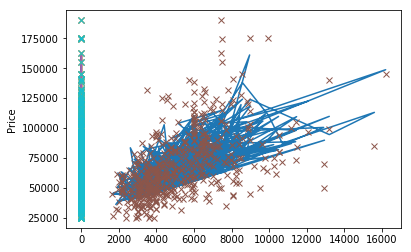

Note: If x consists of more than one feature, the plot would not make any sense.
Reason: The n-dimentions (n features) would be displayed in 2 dimentions.


In [13]:
plt.plot(x,h,x,y,'x')
plt.ylabel("Price")
plt.show()
print("Note: If x consists of more than one feature, the plot would not make any sense.")
print("Reason: The n-dimentions (n features) would be displayed in 2 dimentions.")

In [14]:
score = np.sum((np.abs(np.divide((h-y),y))))/h.size
print("Score using naive Linear Regression: " + str(score))

Score using naive Linear Regression: 0.20734946329186107


### Prediction

In [15]:
try:
    test = np.array([4500, 3, 2, 2, 2])
    val = np.dot(test,w)
    print("%8s | %8s | %9s | %8s | %8s" % ("Lotsize", "Bedrooms", "Bathrooms", "Stories", "Garage"))
    print("%8d | %8d | %9d | %8d | %8d" % (test[0],test[1],test[2],test[3],test[4]))
    print("The predicted value for: " + str(val))
except Exception as e:
    print("Give correct number of inputs to predict")
    print(e)

 Lotsize | Bedrooms | Bathrooms |  Stories |   Garage
    4500 |        3 |         2 |        2 |        2
The predicted value for: 85270.18345983059


# Gradient Descent

In [16]:
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,1,0,1,0,0,1,0
2,38500.0,4000,2,1,1,1,0,0,0,0,0,0
3,49500.0,3060,3,1,1,1,0,0,0,0,0,0
4,60500.0,6650,3,1,2,1,1,0,0,0,0,0
5,61000.0,6360,2,1,1,1,0,0,0,0,0,0


In [17]:
# Normalizing x and y
x = (x-np.min(x,axis=0))/(np.max(x,axis=0)-np.min(x,axis=0))
y = (y-np.min(y,axis=0))/(np.max(y,axis=0)-np.min(y,axis=0))

In [18]:
print("x.shape: " + str(x.shape))
print("y.shape: " + str(y.shape))
m = x.shape[0]
n = x.shape[1]
print("m: " + str(m))
print("n: " + str(n))

t = np.ones((m,1))
x = np.hstack((t,x))
print("x.shape after appending a column for bias: " + str(x.shape))

x.shape: (546, 5)
y.shape: (546,)
m: 546
n: 5
x.shape after appending a column for bias: (546, 6)


In [19]:
w = np.random.rand(1,n+1)
y = np.array(y)
y = np.reshape(y,(y.shape[0],1))
print("x.shape: " + str(x.shape))
print("w.shape: " + str(w.shape))
print("y.shape: " + str(y.shape))

alpha = 0.001 # Learning rate
temp = np.zeros((n+1,1))

iterations = 0
t = 10000
log = np.array([])
while(iterations<t):
    h = np.dot(x,w.T)
    for i in range(n+1):
        temp[i] = w[:,i] - alpha*(1/m)*(np.sum( (h-y)*x[:,i:i+1], axis=0))
    for i in range(n+1):
        w[:,i] = temp[i]
    J = (1/2*m)*np.sum(np.square(h-y))
    log = np.append(log, J)
    iterations+=1

x.shape: (546, 6)
w.shape: (1, 6)
y.shape: (546, 1)


In [20]:
# h = np.dot(x,w.T)
# plt.plot(x[:,1],h,'r',x[:,1],y,'gx')
# plt.xlabel('Lotsize')
# plt.ylabel('Price')
# plt.show()

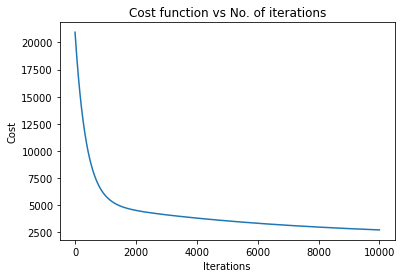

In [21]:
it = np.arange(t)
plt.plot(it, log)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function vs No. of iterations')
plt.show()

In [22]:
print("Minimum Loss: " + str(log.min()))

Minimum Loss: 2733.343894050755


# Conclusion

Minimum value for loss is 2733.
<Baki ka likh do>